# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

In [ ]:
# path = kagglehub.dataset_download("samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025")
# print("Path to dataset files:", path)
# df = pd.read_csv(path + '/salaries.csv')

### Load dari lokal

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Assesing data

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Check Missing Value

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


##### Analisis Distribusi, korelasi dan visualisasi data

fitur numerik

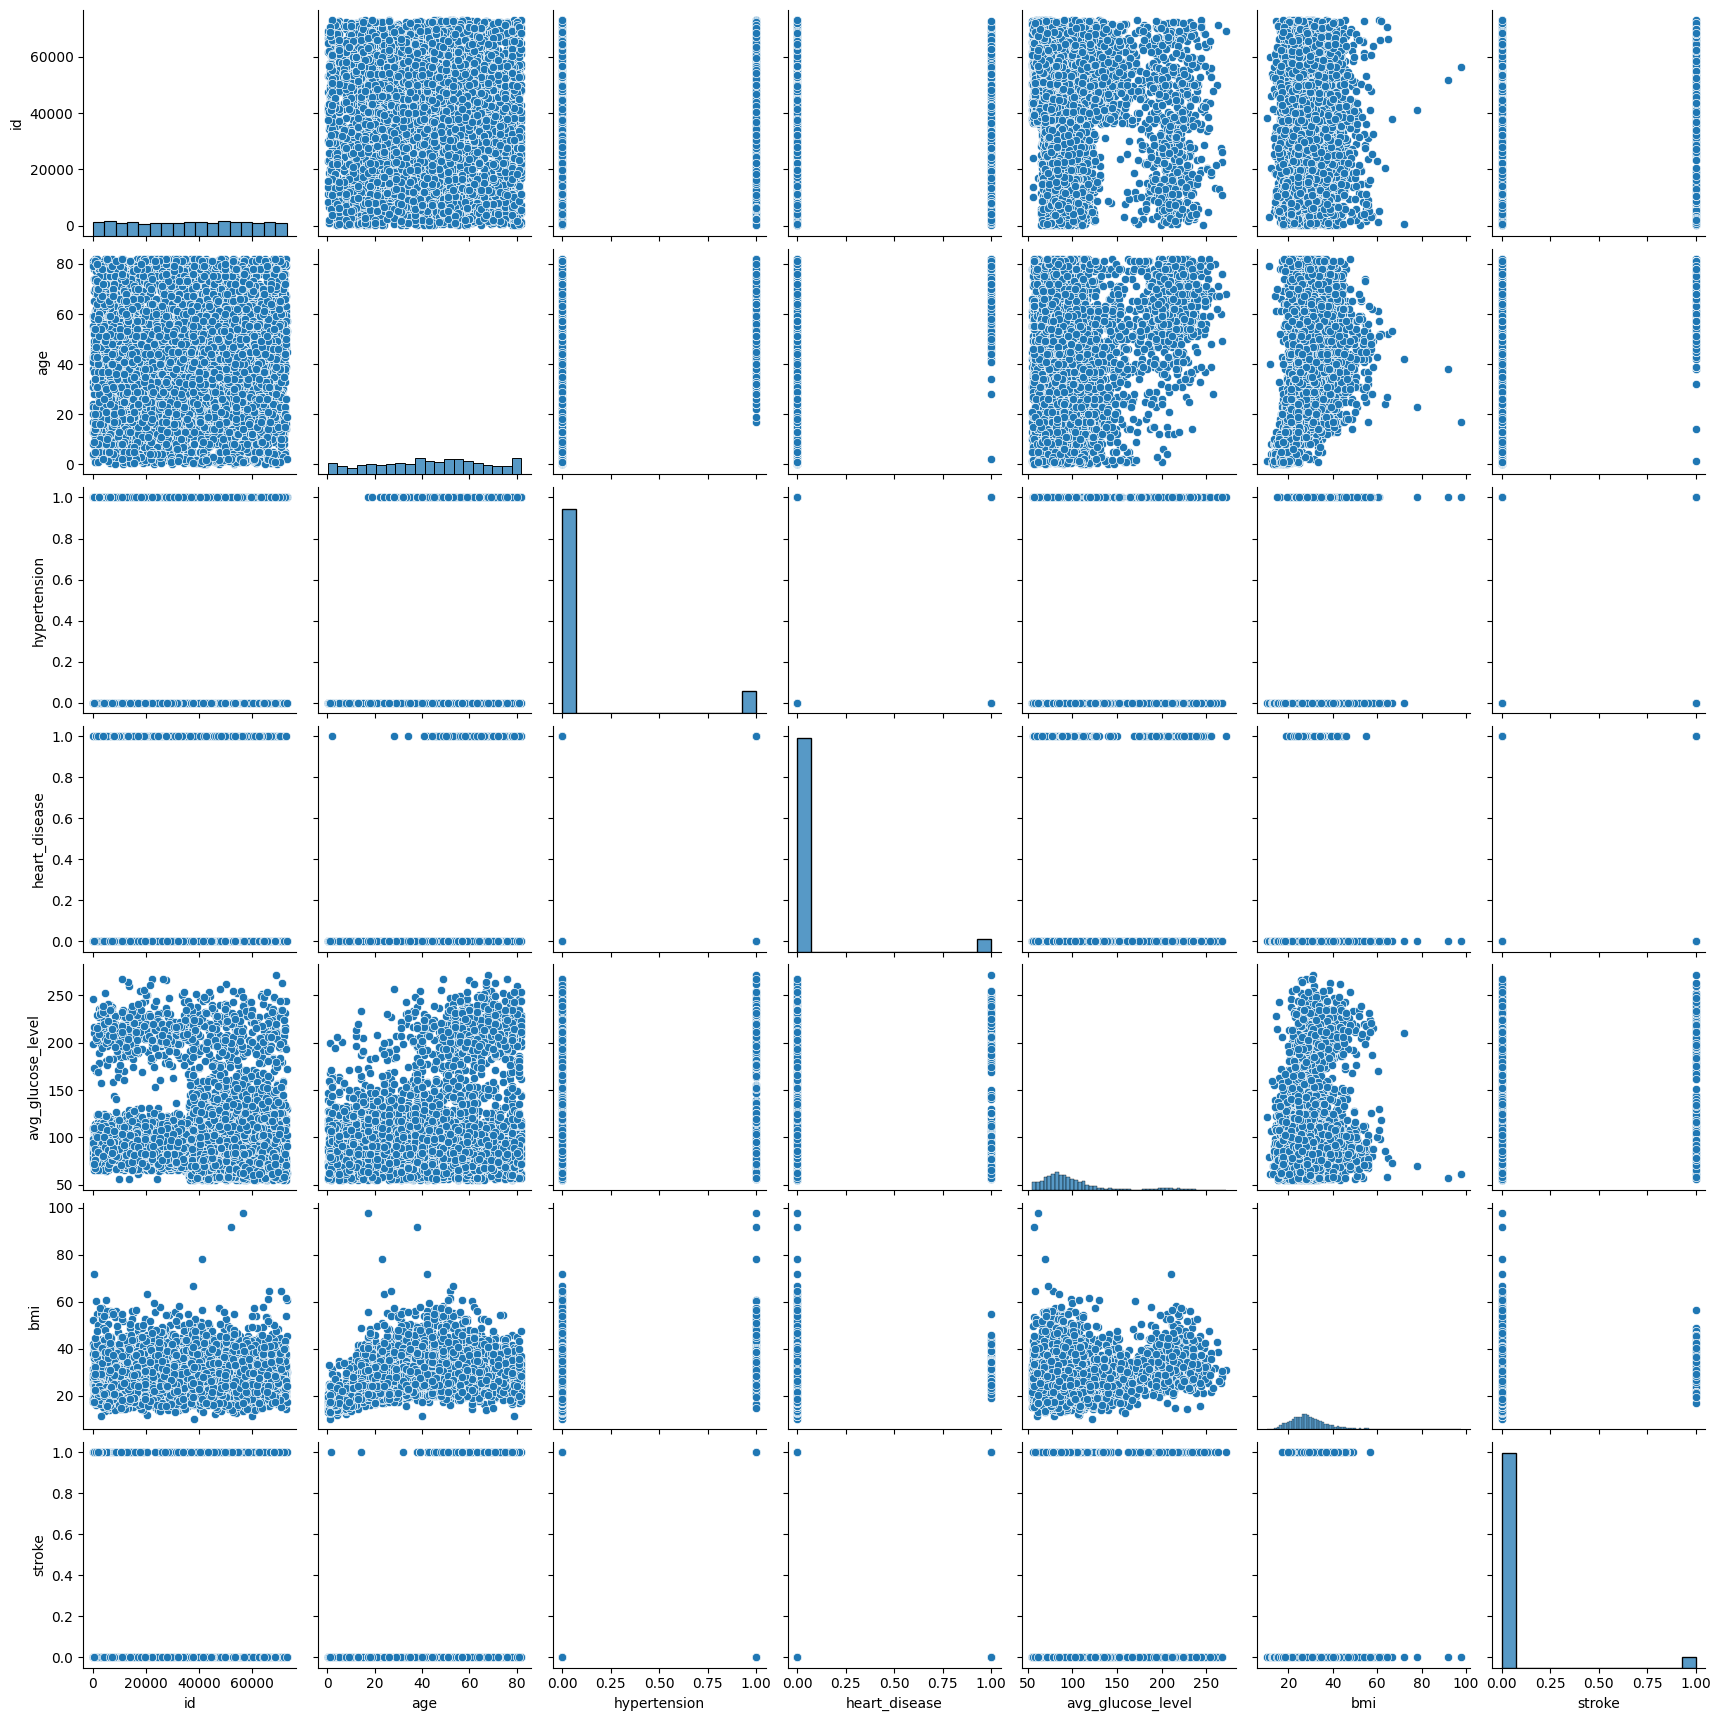

In [ ]:
sns.pairplot(df)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

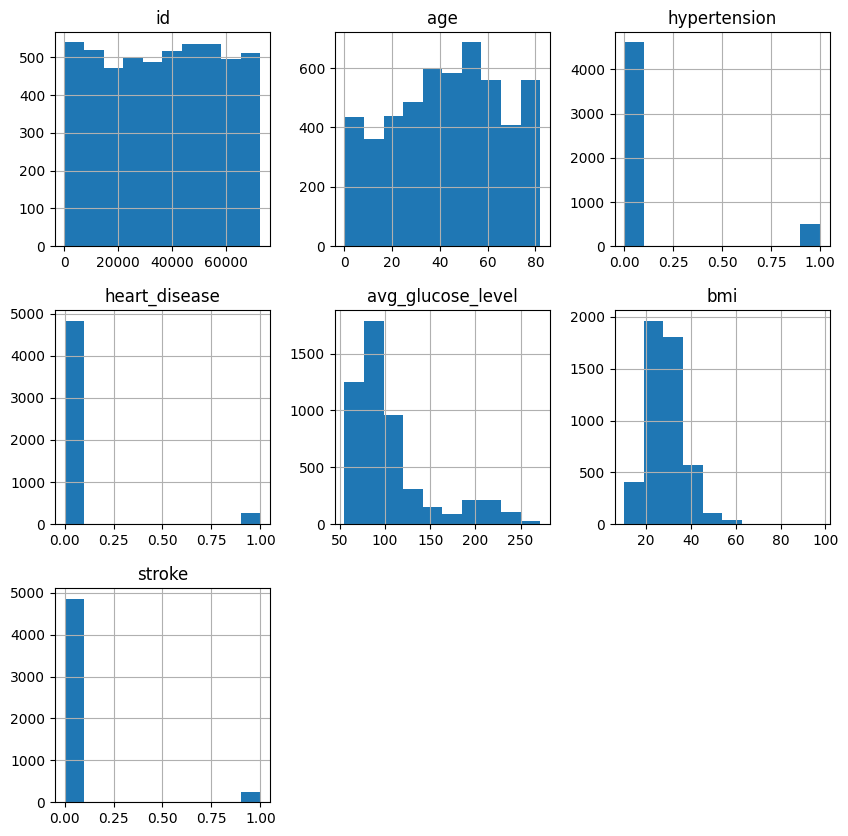

In [ ]:
df.hist(figsize=(10, 10))

Fitur Kategori

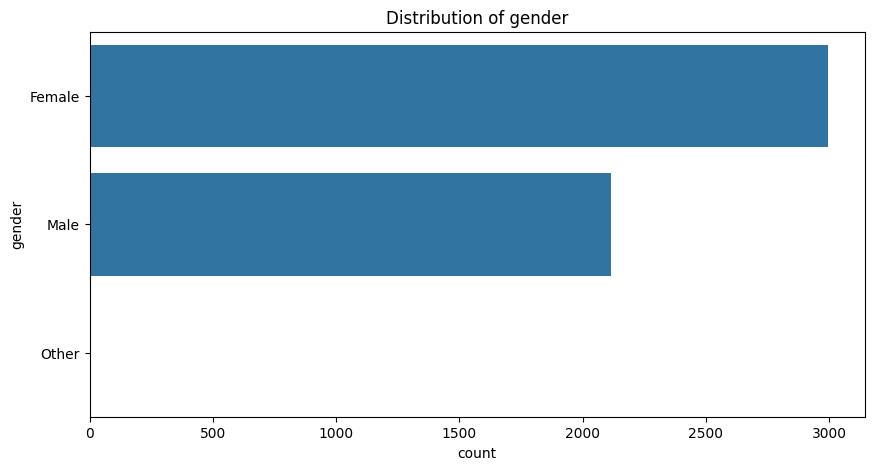

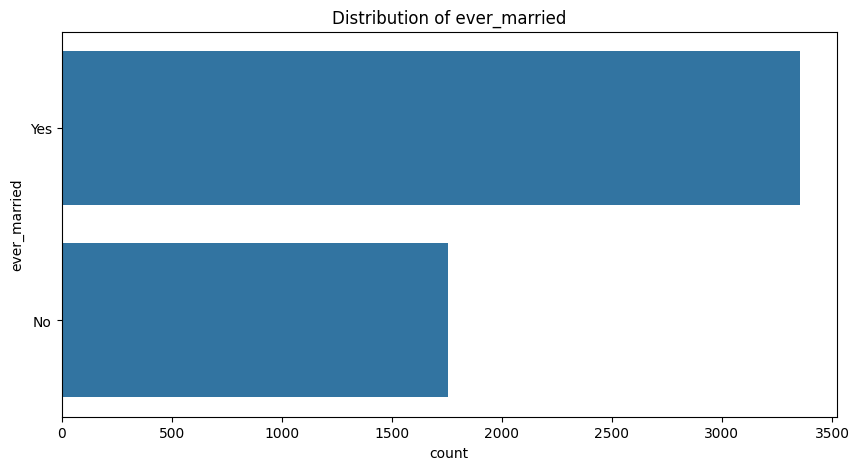

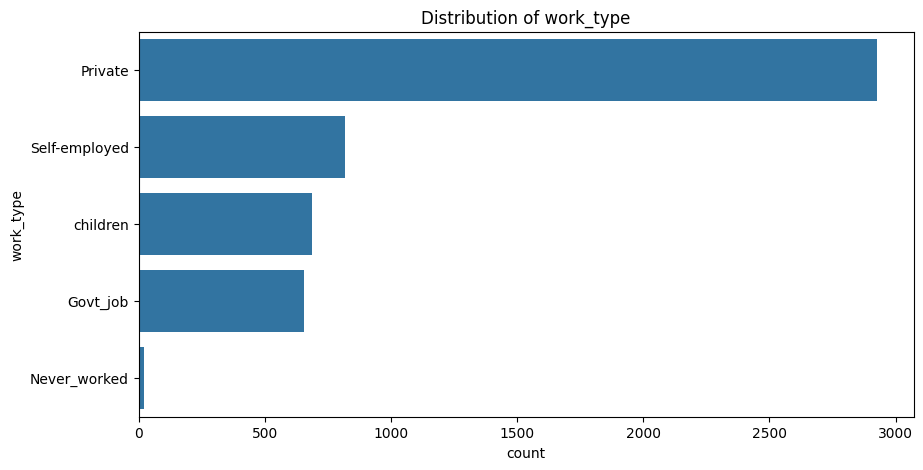

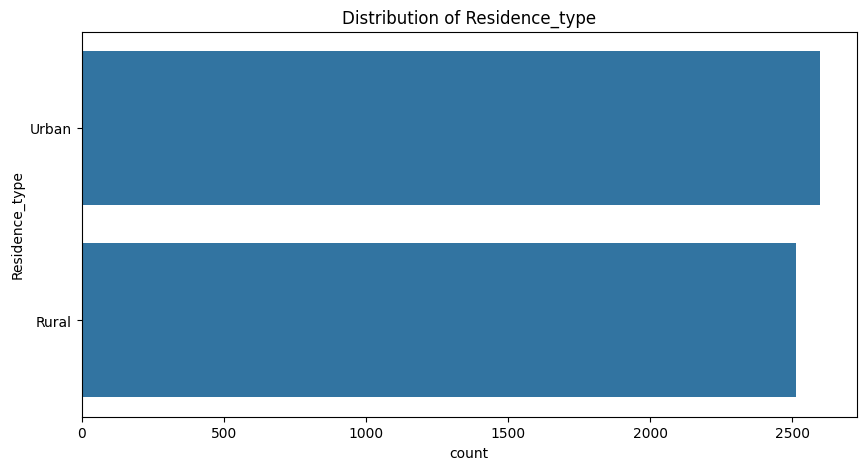

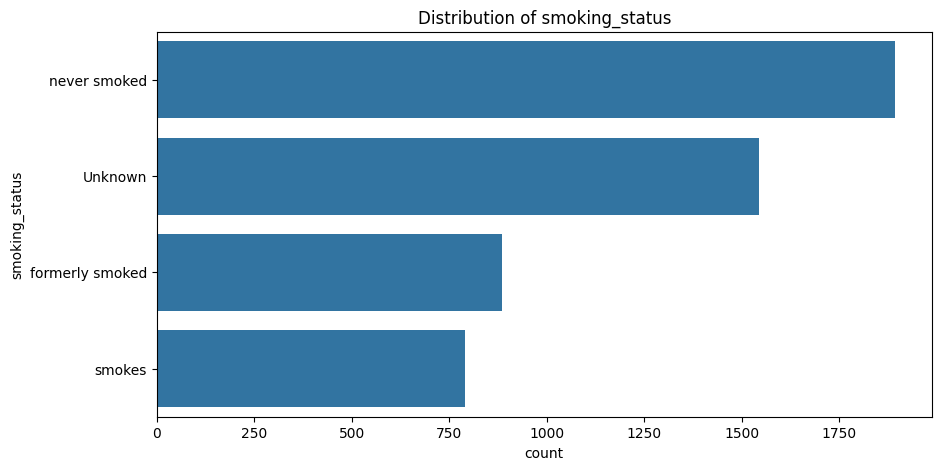

In [ ]:
category = df.select_dtypes(include='object')
for col in category.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=category, order=category[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

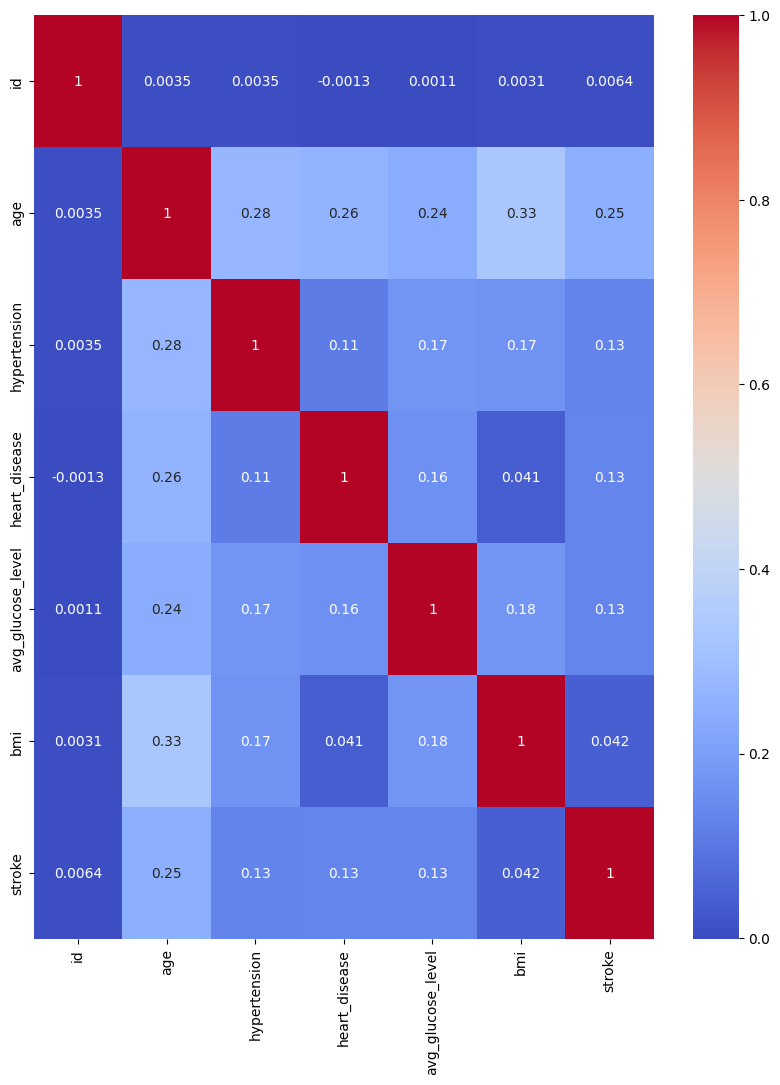

In [ ]:
plt.figure(figsize=(10,12))
numerical = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

check data duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

###### check outlier

In [ ]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df)

Outlier / jumlah data

Outlier id : 0.0%
Outlier age : 0.0%
Outlier hypertension : 9.75%
Outlier heart_disease : 5.4%
Outlier avg_glucose_level : 12.27%
Outlier bmi : 2.15%
Outlier stroke : 4.87%


In [ ]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # filter hanya data yang *tidak* outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers(df,['avg_glucose_level'])

In [ ]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df_clean)

Outlier / jumlah data

Outlier id : 0.0%
Outlier age : 0.0%
Outlier hypertension : 7.49%
Outlier heart_disease : 3.86%
Outlier avg_glucose_level : 2.74%
Outlier bmi : 2.01%
Outlier stroke : 3.68%


In [ ]:
df_clean.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,140


In [ ]:
df_clean['bmi'].fillna(df_clean['bmi'].mean(), inplace=True)

<ipython-input-387-f38cfba884ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bmi'].fillna(df_clean['bmi'].mean(), inplace=True)
<ipython-input-387-f38cfba884ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bmi'].fillna(df_clean['bmi'].mean(), inplace=True)


In [ ]:
df_clean.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


###### Encoding data kategori

pengecekan jumlah unique value di tiap fitur kategori

In [ ]:
categorical_feature = df_clean.select_dtypes(include=['object','category'])
high_cardinal_column = []
low_cardinal_column = []
for col in categorical_feature.columns:
    print(f'unique value {col} : {categorical_feature[col].nunique()}')
    if categorical_feature[col].nunique() > 10:
        high_cardinal_column.append(col)
    else:
        low_cardinal_column.append(col)

unique value gender : 3
unique value ever_married : 2
unique value work_type : 5
unique value Residence_type : 2
unique value smoking_status : 4


In [ ]:
categorical_feature['stroke'] = df['stroke']
categorical_feature

,gender,ever_married,work_type,Residence_type,smoking_status,stroke
2,Male,Yes,Private,Rural,never smoked,1
6,Male,Yes,Private,Rural,never smoked,1
7,Female,No,Private,Urban,never smoked,1
8,Female,Yes,Private,Rural,Unknown,1
9,Female,Yes,Private,Urban,Unknown,1
...,...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked,0
5106,Female,Yes,Self-employed,Urban,never smoked,0
5107,Female,Yes,Self-employed,Rural,never smoked,0
5108,Male,Yes,Private,Rural,formerly smoked,0


In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    print(f"\nStroke Rate untuk '{col}':\n")
    stroke_rate = df.groupby(col)['stroke'].agg(
        total='count',
        stroke_count='sum'
    )
    stroke_rate['stroke_rate (%)'] = (stroke_rate['stroke_count'] / stroke_rate['total']) * 100
    print(stroke_rate.sort_values('stroke_rate (%)', ascending=False).round(2))



Stroke Rate untuk 'gender':

        total  stroke_count  stroke_rate (%)
gender                                      
Male     2115           108             5.11
Female   2994           141             4.71
Other       1             0             0.00

Stroke Rate untuk 'ever_married':

              total  stroke_count  stroke_rate (%)
ever_married                                      
Yes            3353           220             6.56
No             1757            29             1.65

Stroke Rate untuk 'work_type':

               total  stroke_count  stroke_rate (%)
work_type                                          
Self-employed    819            65             7.94
Private         2925           149             5.09
Govt_job         657            33             5.02
children         687             2             0.29
Never_worked      22             0             0.00

Stroke Rate untuk 'Residence_type':

                total  stroke_count  stroke_rate (%)
Residence_type   

Membuat mapping label berdasarkan stroke rate

In [ ]:
gender = {
    'Male' : 1,
    'Female' : 0,
    'Other' : 0
}
ever_married = {
    'Yes' : 1,
    'No' : 0
}
work_type = {
    'Self-employed': 2,
    'Private': 1,
    'Govt_job': 1,
    'children': 0,
    'Never_worked': 0
}

residence = {
    'Urban' : 1,
    'Rural' : 0
}

smoking_status_numeric = {
    'formerly smoked': 3,
    'smokes': 2,
    'never smoked': 1,
    'Unknown': 0
}

gak nambah akurasi

#### Dummy encoding

In [ ]:
categorical_feature.drop('stroke',inplace=True,axis=1)
categorical_feature['gender'] = categorical_feature['gender'].map(gender)
categorical_feature['ever_married'] = categorical_feature['ever_married'].map(ever_married)
categorical_feature['work_type'] = categorical_feature['work_type'].map(work_type)
categorical_feature['Residence_type'] = categorical_feature['Residence_type'].map(residence)
categorical_feature['smoking_status'] = categorical_feature['smoking_status'].map(smoking_status_numeric)



In [ ]:
categorical_feature

,gender,ever_married,work_type,Residence_type,smoking_status
2,1,1,1,0,1
6,1,1,1,0,1
7,0,0,1,1,1
8,0,1,1,0,0
9,0,1,1,1,0
...,...,...,...,...,...
5105,0,1,1,1,1
5106,0,1,2,1,1
5107,0,1,2,0,1
5108,1,1,1,0,3


menggabungkan kembali dengan numeric feature

In [ ]:
numerical_feature = df_clean.select_dtypes(include=['int64', 'float64'])
df_encoded = pd.concat([numerical_feature,categorical_feature], axis=1)
df_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
2,31112,80.0,0,1,105.92,32.500000,1,1,1,1,0,1
6,53882,74.0,1,1,70.09,27.400000,1,1,1,1,0,1
7,10434,69.0,0,0,94.39,22.800000,1,0,0,1,1,1
8,27419,59.0,0,0,76.15,28.311996,1,0,1,1,0,0
9,60491,78.0,0,0,58.57,24.200000,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.311996,0,0,1,1,1,1
5106,44873,81.0,0,0,125.20,40.000000,0,0,1,2,1,1
5107,19723,35.0,0,0,82.99,30.600000,0,0,1,2,0,1
5108,37544,51.0,0,0,166.29,25.600000,0,1,1,1,0,3


In [ ]:
df_encoded.isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0
gender,0
ever_married,0
work_type,0


In [ ]:
# df_encoded['stroke'] = df_clean['stroke']
# df_encoded.head

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your preprocessed DataFrame
X = df_encoded.drop(['id','stroke'], axis=1)
y = df_encoded['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Now you can use the trained model to make predictions on the test set
# and evaluate its performance.
# Example:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9420289855072463


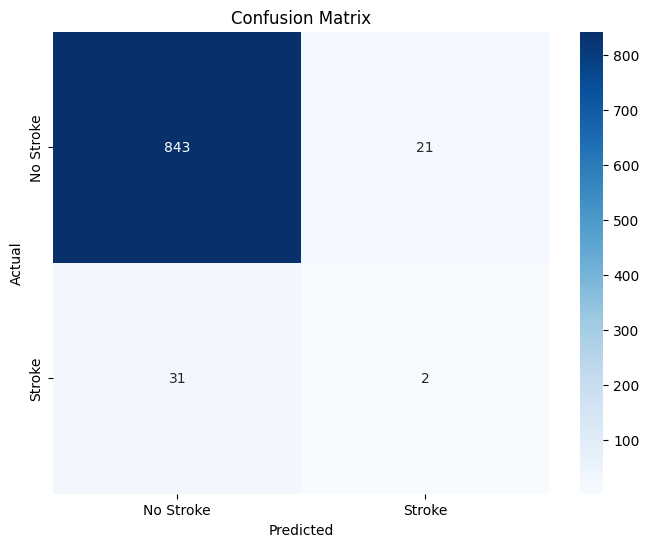

In [ ]:
# prompt: create confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


             Feature  Importance
0                age    0.450804
4                bmi    0.197174
3  avg_glucose_level    0.190592
1       hypertension    0.037578
9     smoking_status    0.035140
5             gender    0.031569
8     Residence_type    0.022564
7          work_type    0.014589
2      heart_disease    0.010604
6       ever_married    0.009386


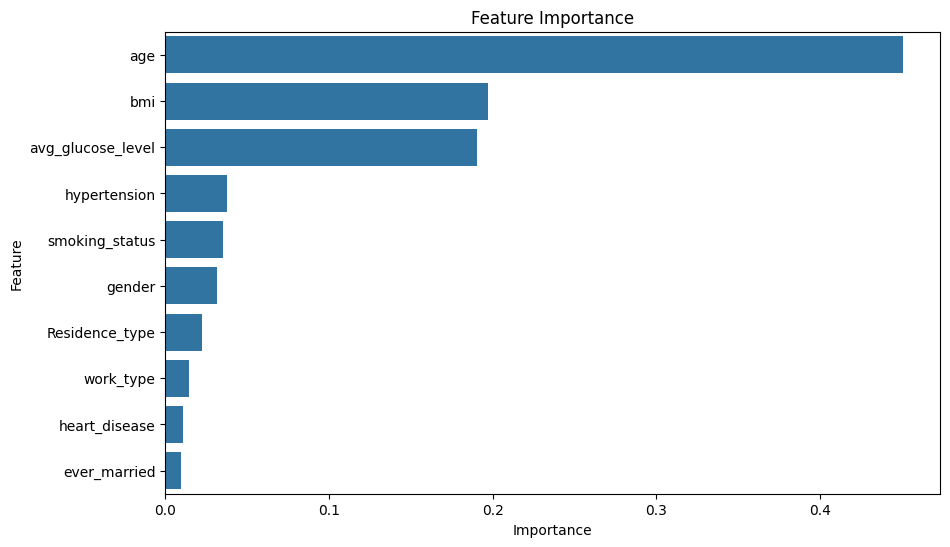

In [ ]:
# prompt: show feature importance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# ... (Your existing code) ...

# Assuming X_train and X_test are already defined from your previous code
# and the model is trained as in the previous code snippet

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
feature_importance_columns = feature_importance_df['Feature'].head(5).tolist()
feature_importance_columns

['age', 'bmi', 'avg_glucose_level', 'hypertension', 'smoking_status']

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your preprocessed DataFrame
X = df_encoded[feature_importance_columns]
y = df_encoded['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Now you can use the trained model to make predictions on the test set
# and evaluate its performance.
# Example:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9342251950947603


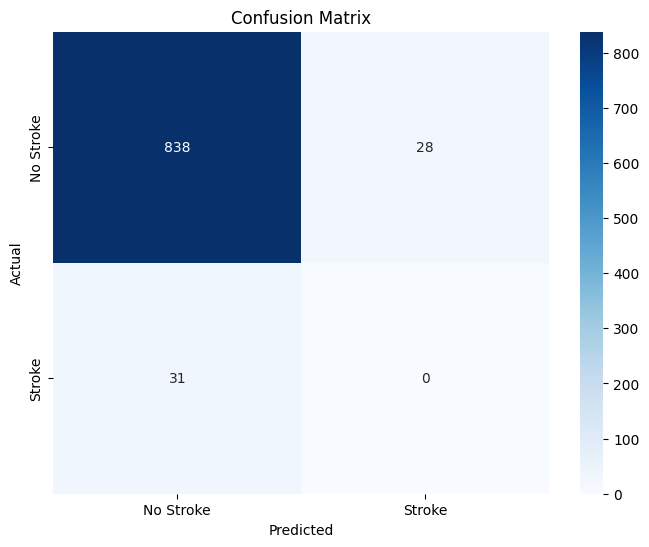

In [ ]:
# prompt: create confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Using SMOTE

In [ ]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.89520624303233


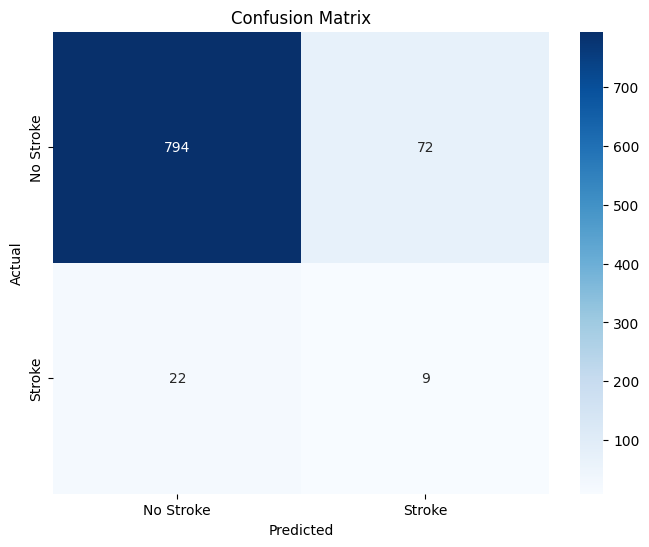

In [ ]:
# prompt: create confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
